# Predicting Parkinson's from Patient's hand drawings

#### Importing required libraries

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage import feature
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("F:\\Deep Learning\\Parkinsons\\Data")

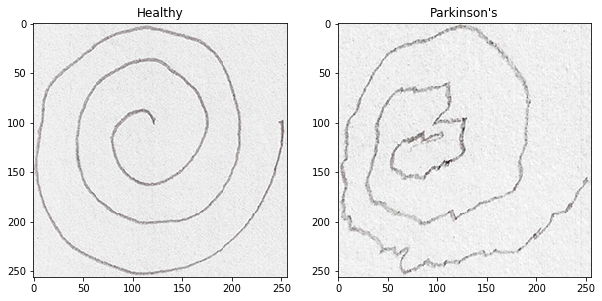

In [3]:
plt.figure(figsize = (10,10))

plt.subplot(121)
healthy_spiral = cv2.imread("spiral\\training\\healthy\\V10HE02.png")
plt.imshow(healthy_spiral)
plt.title("Healthy")

plt.subplot(122)
park_spiral = cv2.imread("spiral\\training\\parkinson\\V03PE05.png")
plt.imshow(park_spiral)
plt.title("Parkinson's")
plt.show()

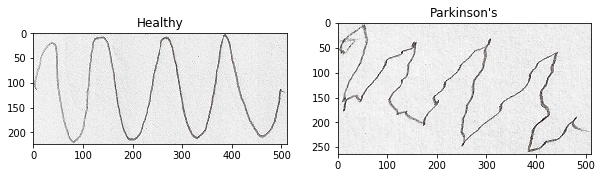

In [4]:
plt.figure(figsize = (10,10))

plt.subplot(121)
healthy_wave = cv2.imread("wave\\training\\healthy\\V10HO03.png")
plt.imshow(healthy_wave)
plt.title("Healthy")

plt.subplot(122)
park_wave = cv2.imread("wave\\training\\parkinson\\V03PO02.png")
plt.imshow(park_wave)
plt.title("Parkinson's")
plt.show()

#### Extract HOG features

In [5]:
def quantify_image(image):
    features = feature.hog(image, orientations=9,pixels_per_cell=(10, 10), 
                           cells_per_block=(2, 2),transform_sqrt=True, block_norm="L1")
    return features

In [6]:
def load_images(path):
    data = []
    for img in glob.glob(path):
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200,200))
        image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantify_image(image)
        data.append(features)
    return np.array(data)

#### Load Training images

In [7]:
spiral_healthy_data, spiral_healthy_label = (load_images(path = "spiral\\training\\healthy\\*.png"),np.array(["Healthy"]*36))
wave_healthy_data, wave_healthy_label  = (load_images(path = "wave\\training\\healthy\\*.png"),np.array(["Healthy"]*36))

In [8]:
spiral_park_data, spiral_park_label = (load_images(path = "spiral\\training\\parkinson\\*.png"),np.array(["Parkinson's"]*36))
wave_park_data, wave_park_label = (load_images(path = "wave\\training\\parkinson\\*.png"),np.array(["Parkinson's"]*36))

In [9]:
spiral_training_data = np.concatenate((spiral_healthy_data, spiral_park_data), axis = 0)
spiral_training_labels = np.concatenate((spiral_healthy_label, spiral_park_label), axis = 0)

In [10]:
wave_training_data = np.concatenate((wave_healthy_data, wave_park_data), axis = 0)
wave_training_labels = np.concatenate((wave_healthy_label, wave_park_label), axis = 0)

#### Making Train and Validation split

In [11]:
X_train_spiral, X_val_spiral, y_train_spiral, y_val_spiral = train_test_split(spiral_training_data, spiral_training_labels, 
                                                                              test_size = 0.30, 
                                                                              random_state = 45)

In [12]:
X_train_wave, X_val_wave, y_train_wave, y_val_wave = train_test_split(wave_training_data, wave_training_labels, 
                                                                      test_size = 0.30, 
                                                                      random_state = 45)

#### SVM on Spiral Images

In [13]:
svc_spiral = SVC()

In [14]:
params = {"C":[0.01, 0.1, 1, 10],
         "gamma":[0.001, 0.01, 0.1, 1],
         "kernel":["rbf","linear"]}

In [15]:
grid_spiral = GridSearchCV(estimator = svc_spiral, param_grid = params)
grid_spiral.fit(X_train_spiral, y_train_spiral)

C:\Users\Chinna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Chinna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
grid_spiral.best_params_

{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}

In [17]:
svc_spiral = SVC(C = 0.01, gamma = 0.001, kernel = "rbf")
svc_spiral.fit(X_train_spiral, y_train_spiral)
preds_spiral = svc_spiral.predict(X_val_spiral)

In [18]:
print(f"Accuracy on Spiral images: {accuracy_score(y_val_spiral, preds_spiral) * 100}")

Accuracy on Spiral images: 81.81818181818183


#### SVM on Wave Images

In [19]:
svc_wave = SVC()

In [20]:
params = {"C":[0.01, 0.1, 1, 10],
         "gamma":[0.001, 0.01, 0.1, 1],
         "kernel":["rbf","linear"]}

In [21]:
grid_spiral = GridSearchCV(estimator = svc_wave, param_grid = params)
grid_spiral.fit(X_train_wave, y_train_wave)

C:\Users\Chinna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Chinna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid_spiral.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
svc_wave = SVC(C = 0.01, gamma = 1, kernel = 'rbf')

In [24]:
svc_wave.fit(X_train_wave, y_train_wave)
preds_wave = svc_wave.predict(X_val_wave)
print(f"Accuracy on Wave images: {accuracy_score(y_val_wave, preds_wave) * 100}")

Accuracy on Wave images: 77.27272727272727


### Visulaizing predictions on Test data

#### Spiral drawings by people without Parkinson's

In [25]:
#Load images
spiral_healthy_data_test, spiral_healthy_label_test = (load_images(path = "spiral\\testing\\healthy\\*.png"),
                                                       np.array(["Healthy"]*15))
spiral_park_data_test, spiral_park_label_test = (load_images(path = "spiral\\testing\\parkinson\\*.png"),
                                                 np.array(["Parkinson's"]*15))

#make predictions
X_test_spiral = np.concatenate((spiral_healthy_data_test, spiral_park_data_test), axis = 0)
y_test_spiral = np.concatenate((spiral_healthy_label_test, spiral_park_label_test), axis = 0)
preds_test_spiral = svc_spiral.predict(X_test_spiral)

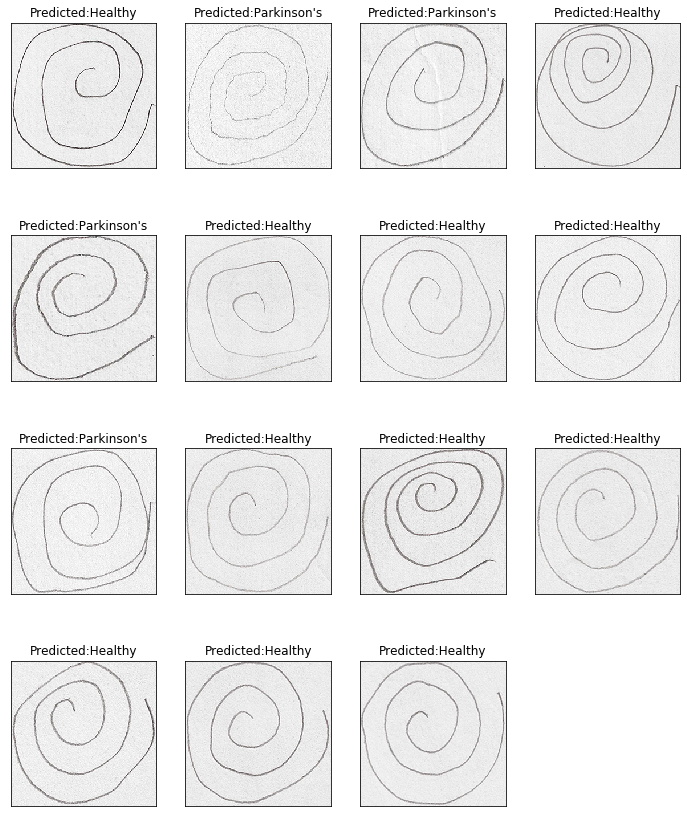

In [26]:
plt.figure(figsize=(12,15))
for i,img in enumerate(glob.glob("spiral\\testing\\healthy\\*.png")):
    plt.subplot(4,4,i+1)
    image = cv2.imread(img)
    plt.imshow(image)
    plt.title(f"Predicted:{preds_test_spiral[i]}")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)

#### Spiral drawings by people with Parkinson's

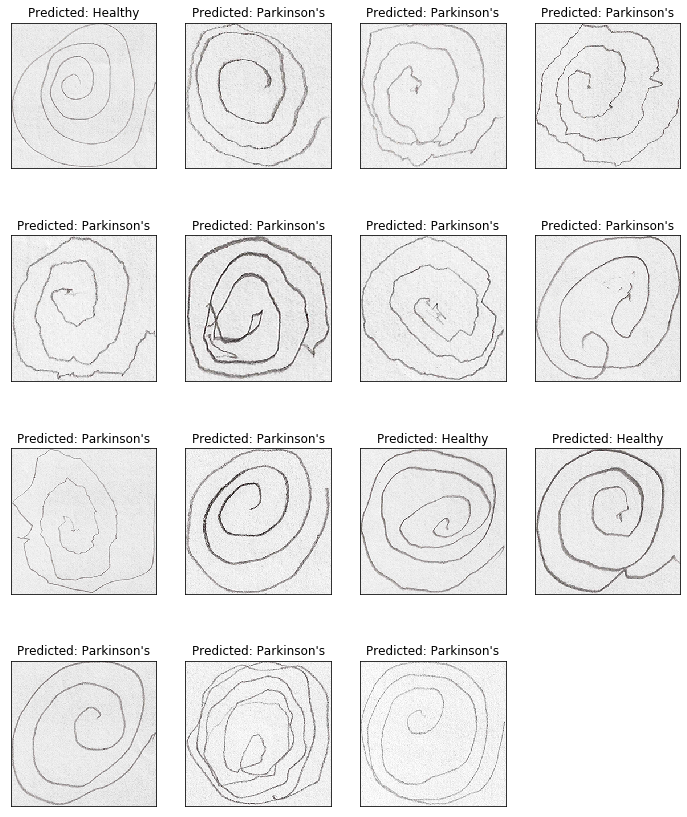

In [27]:
plt.figure(figsize=(12,15))

for i,img in enumerate(glob.glob("spiral\\testing\\parkinson\\*.png")):
    plt.subplot(4,4,i+1)
    image = cv2.imread(img)
    plt.imshow(image)
    plt.title(f"Predicted: {preds_test_spiral[i+15]}")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)

#### Wave drawings by people without Parkinson's

In [28]:
wave_healthy_data_test, wave_healthy_label_test = (load_images(path = "wave\\testing\\healthy\\*.png"),
                                                       np.array(["Healthy"]*15))
wave_park_data_test, wave_park_label_test = (load_images(path = "wave\\testing\\parkinson\\*.png"),
                                                 np.array(["Parkinson's"]*15))

#make predictions
X_test_wave = np.concatenate((wave_healthy_data_test, wave_park_data_test), axis = 0)
y_test_wave = np.concatenate((wave_healthy_label_test, wave_park_label_test), axis = 0)
preds_test_wave = svc_wave.predict(X_test_wave)

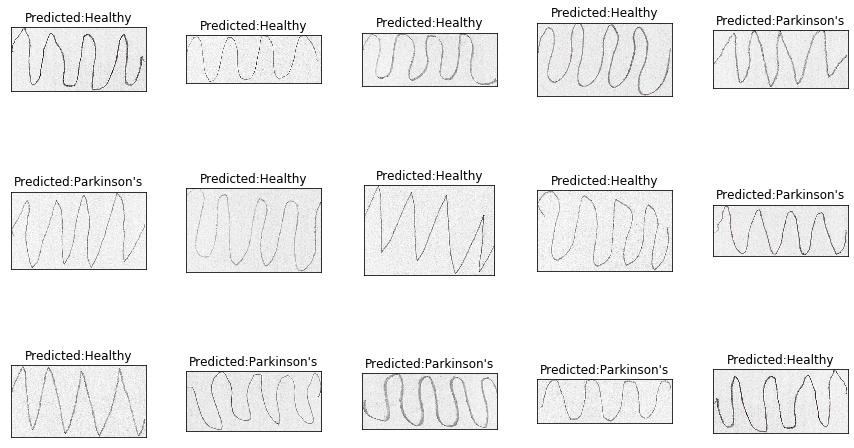

In [29]:
plt.figure(figsize=(15,20))
for i,img in enumerate(glob.glob("wave\\testing\\healthy\\*.png")):
    plt.subplot(3,5,i+1)
    image = cv2.imread(img)
    plt.imshow(image)
    plt.title(f"Predicted:{preds_test_wave[i]}")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
plt.subplots_adjust(bottom=0.1, top=0.4, wspace=0.3, hspace=0.9)
plt.show()

#### Wave drawings by people with Parkinson's

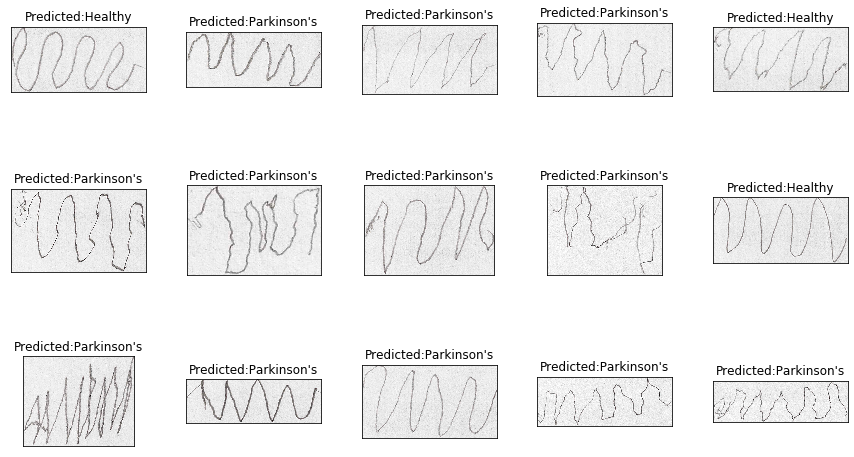

In [30]:
plt.figure(figsize=(15,20))
for i,img in enumerate(glob.glob("wave\\testing\\parkinson\\*.png")):
    plt.subplot(3,5,i+1)
    image = cv2.imread(img)
    plt.imshow(image)
    plt.title(f"Predicted:{preds_test_wave[i+15]}")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
plt.subplots_adjust(bottom=0.1, top=0.4, wspace=0.3, hspace=0.9)
plt.show()